In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [72]:
bd = load_boston()
df = pd.DataFrame(bd.data, columns=bd.feature_names)
df['MEDV'] = bd.target

In [73]:
X = df.drop('MEDV',axis=1)
y = df.MEDV

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [75]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [76]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [77]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [78]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


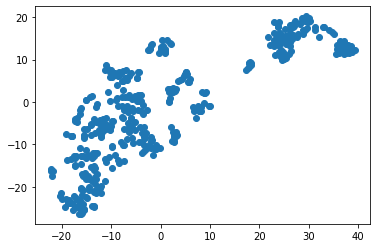

In [79]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

In [80]:
kmeans = KMeans(n_clusters=3, max_iter=100)

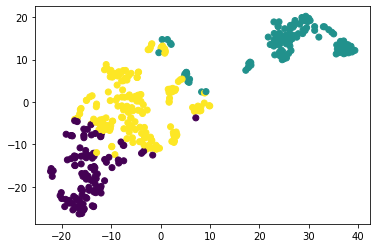

In [81]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);


In [82]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.08065711711711714
Кластер 1: 11.744692241379312
Кластер 2: 0.49010796610169494


In [83]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.08065711711711714
Кластер 1: 11.744692241379312
Кластер 2: 0.49010796610169494


In [84]:
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

27.387387387387385
16.0698275862069
24.32598870056497


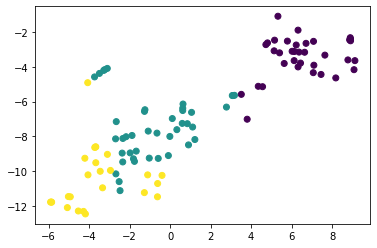

In [85]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test);

In [86]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 10.165531142857143
Кластер 1: 0.28811357142857147
Кластер 2: 0.0984884


In [87]:
print(y_test[labels_test == 0].mean())
print(y_test[labels_test == 1].mean())
print(y_test[labels_test == 2].mean())

16.437142857142856
20.41904761904762
30.355999999999995
